# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [1]:
# http://pytorch.org/
import torch

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [3]:
batch_size = 1000

### Carregamento, criação dataset e do dataloader

In [4]:
! git clone https://github.com/vcasadei/MNIST.git

Cloning into 'MNIST'...
remote: Enumerating objects: 10, done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 10 (from 1)
Receiving objects: 100% (10/10), 11.01 MiB | 18.01 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [5]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

100%|██████████| 9.91M/9.91M [00:00<00:00, 42.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.15MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 10.8MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 11.0MB/s]


Número de minibatches de trenamento: 60

Dimensões dos dados de um minibatch: torch.Size([1000, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando apenas 1000 amostras do MNIST

Neste exemplo utilizaremos 1000 amostras de treinamento.

In [6]:
if False:
    n_samples_train = 1000

    dataset_train.train_data = dataset_train.train_data[:n_samples_train]
    dataset_train.train_labels = dataset_train.train_labels[:n_samples_train]

print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de trenamento: 60


/usr/local/lib/python3.11/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


## Modelo

In [7]:
model = torch.nn.Linear(28*28, 10)


In [8]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[-0.0720,  0.1015, -0.0624,  0.1322,  0.4660,  0.5765,  0.5826, -0.0718,
          0.2802,  0.1964]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [9]:
n_epochs = 50
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [10]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)
        #print(k)
    print(f'Época: {i}/{n_epochs-1} minibatch: {k}')#.format(i,n_epochs-1))#, end='\r')


Época: 0/49 minibatch: 59
Época: 1/49 minibatch: 59
Época: 2/49 minibatch: 59
Época: 3/49 minibatch: 59
Época: 4/49 minibatch: 59
Época: 5/49 minibatch: 59
Época: 6/49 minibatch: 59
Época: 7/49 minibatch: 59
Época: 8/49 minibatch: 59
Época: 9/49 minibatch: 59
Época: 10/49 minibatch: 59
Época: 11/49 minibatch: 59
Época: 12/49 minibatch: 59
Época: 13/49 minibatch: 59
Época: 14/49 minibatch: 59
Época: 15/49 minibatch: 59
Época: 16/49 minibatch: 59
Época: 17/49 minibatch: 59
Época: 18/49 minibatch: 59
Época: 19/49 minibatch: 59
Época: 20/49 minibatch: 59
Época: 21/49 minibatch: 59
Época: 22/49 minibatch: 59
Época: 23/49 minibatch: 59
Época: 24/49 minibatch: 59
Época: 25/49 minibatch: 59
Época: 26/49 minibatch: 59
Época: 27/49 minibatch: 59
Época: 28/49 minibatch: 59
Época: 29/49 minibatch: 59
Época: 30/49 minibatch: 59
Época: 31/49 minibatch: 59
Época: 32/49 minibatch: 59
Época: 33/49 minibatch: 59
Época: 34/49 minibatch: 59
Época: 35/49 minibatch: 59
Época: 36/49 minibatch: 59
Época: 37/4

In [11]:
print('Final loss:', loss.data)

Final loss: tensor(0.2447)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

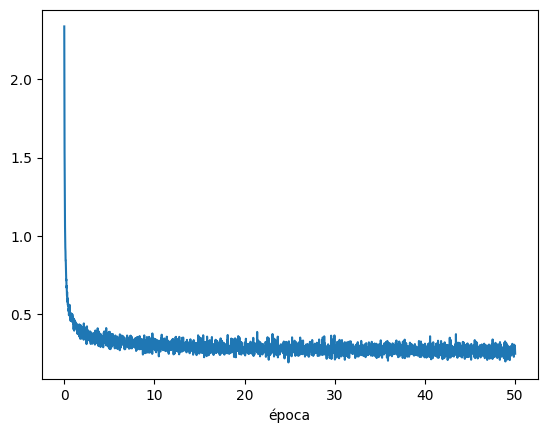

In [12]:
plt.plot(epochs, losses)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

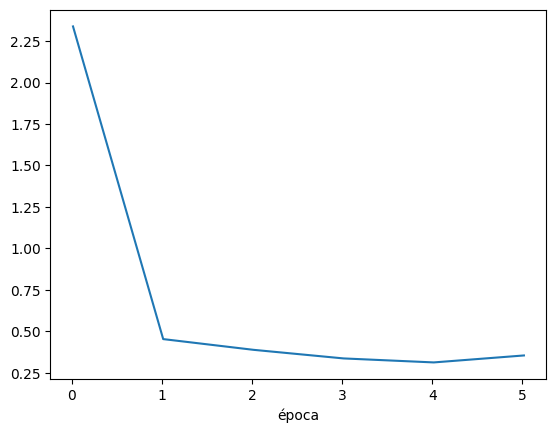

In [13]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

1. Qual é o tamanho do mini-batch?R.:100
2. Em uma época, quantos mini-batches existem?R.:600
3. Qual é a definição de época?R.:Uma passada completa por todo o conjunto de dados de treinamento.

## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 3/10
2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

In [14]:
# 1.
n_epochs = 5
learningRate = 0.5

epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

        if k == len(loader_train) - 1:
          print(f'Época: {i+1}/{n_epochs}, batch: {k+1}')

Época: 1/5, batch: 60
Época: 2/5, batch: 60
Época: 3/5, batch: 60
Época: 4/5, batch: 60
Época: 5/5, batch: 60


In [15]:
# 2.
def train_model(batch_size):
  dataset_dir = 'MNIST/'
  dataset_train = MNIST(dataset_dir, train=True, download=True,
                        transform=torchvision.transforms.ToTensor())

  loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
  print(f'Batch size: {batch_size}')
  print('Número de minibatches de trenamento:', len(loader_train))
  n_batches_train = len(loader_train)

  model = torch.nn.Linear(28*28, 10)
  n_epochs = 5
  learningRate = 0.5

  # Utilizaremos CrossEntropyLoss como função de perda
  criterion = torch.nn.CrossEntropyLoss()

  # Gradiente descendente
  optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

  epochs = []
  losses = []

  total_trained_samples = 0
  for i in range(n_epochs):
      for k,(x_train, y_train) in enumerate(loader_train):
          # Transforma a entrada para uma dimensão
          inputs = Variable(x_train.view(-1, 28 * 28))
          # predict da rede
          outputs = model(inputs)

          # calcula a perda
          loss = criterion(outputs, Variable(y_train))

          # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

          total_trained_samples += x_train.size(0)
          epochs.append(total_trained_samples / total_samples)
          losses.append(loss.data)

          if k == len(loader_train) - 1:
            # print(f'Época: {i+1}/{n_epochs}, batch: {k+1}')
            print(f'Época: {i+1}/{n_epochs}, Batch: {k+1}, Loss: {loss.data:.6f}')

  fig, axes = plt.subplots(1,2, figsize=(16,5))
  axes[0].plot(epochs, losses)
  axes[0].set_xlabel('Época')
  axes[0].set_ylabel('Perda')
  axes[0].set_title('Perda por época')

  axes[1].plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
  axes[1].set_xlabel('Mini-batch')
  axes[1].set_ylabel('Perda')
  axes[1].set_title('Perda por mini-batch')
  plt.show()

Batch size: 10
Número de minibatches de trenamento: 6000
Época: 1/5, Batch: 6000, Loss: 0.952914
Época: 2/5, Batch: 6000, Loss: 0.335128
Época: 3/5, Batch: 6000, Loss: 0.882384
Época: 4/5, Batch: 6000, Loss: 1.967872
Época: 5/5, Batch: 6000, Loss: 0.002538


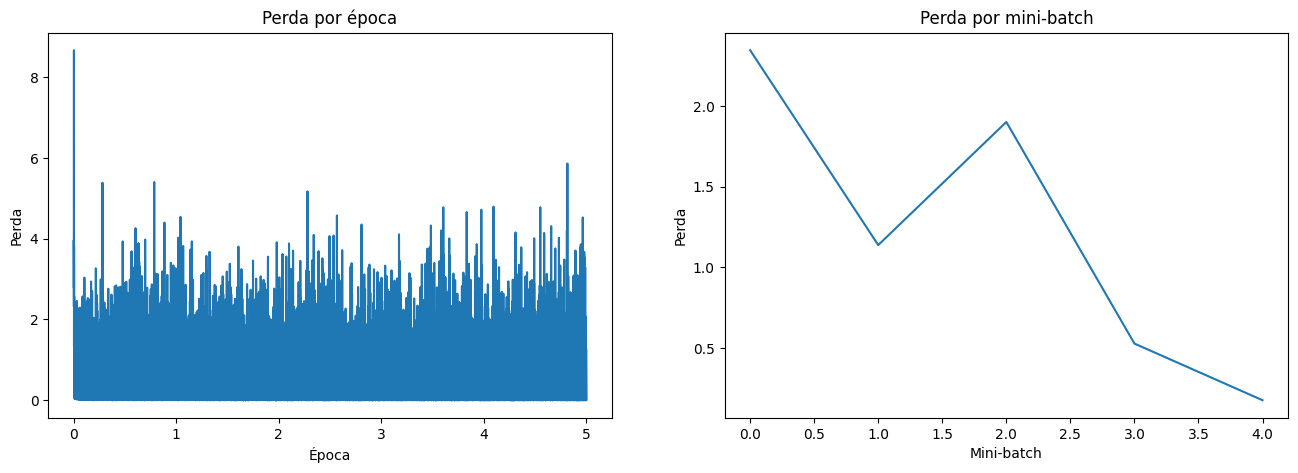

In [16]:
train_model(10)


## Conclusões sobre os experimentos deste notebook


1. O mini-batch contribui com a rapidez da convergência, num mesmo número de épocas
2. Os resultado pode ser mais ruidoso

R.:Um batch_size maior reduz o número de minibatches por época e faz o erro convergir mais rápido e de forma mais estável, com menos oscilações durante o treinamento.
